In [1]:
## 2-a Download the CIFAR-10 dataset and load the pickled data into your program.
## This section contains code for unpickling the various dictionaries in the CIFAR10 dataset.

import numpy as np

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

from keras.utils import np_utils
import os
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split

# Please change this to the appropriate folder on your test machine.
DATA_FOLDER_PATH = "/home/ubuntu/illinois/deeplearning/AS4/data/cifar-10-batches-py"
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
batch_size = 64

# https://www.cs.toronto.edu/~kriz/cifar.html
# https://github.com/keras-team/keras/blob/master/keras/datasets/cifar.py
# https://github.com/keras-team/keras/blob/master/keras/datasets/cifar10.py
# https://lihan.me/2018/01/numpy-reshape-and-transpose/
# https://akshaysin.github.io/cifar_cnn.html#.XMea0-hKiUk
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def read_pickle_files(folder):
    x_data = []
    y_data = []
    x_test = []
    y_test = []
    
    for file in os.listdir(folder):
        if file.endswith(".meta") or file.endswith(".html"):
            print("Ignoring html and meta files")
        elif "test_batch" in file:
            test_data_temp = unpickle(folder + "/" + file)
            x_test.append(test_data_temp[b'data'])
            y_test.append(test_data_temp[b'labels'])
        else:
            temp_data = unpickle(folder + "/" + file)
            x_data.append(temp_data[b'data'])
            y_data.append(temp_data[b'labels'])
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return [x_data, y_data, x_test, y_test]

def load_cifar_data(data_path):
    X_train, Y_train, X_test, Y_test = read_pickle_files(data_path)
    print("X_train shape", X_train.shape)
    print("Y_train shape", Y_train.shape)
    
    X_train = X_train.reshape(X_train.shape[0] * X_train.shape[1], X_train.shape[2])
    Y_train = Y_train.reshape(Y_train.shape[0] * Y_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
    Y_test = Y_test.reshape(Y_test.shape[0] * Y_test.shape[1])

    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    
    X_train = X_train.transpose(0, 2, 3, 1)
    X_test = X_test.transpose(0, 2, 3, 1)
    
    print("X_train shape", X_train.shape)
    print("Y_train shape", Y_train.shape)
    
    return X_train, Y_train, X_test, Y_test

def train_val_split(X_train, Y_train, split_size = 0.2):
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=split_size, random_state=4)
    return X_train, X_val, Y_train, Y_val
   
def transform_data(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    X_train = X_train.astype('float32')
    X_val = X_val.astype('float32')
    X_test = X_test.astype('float32')
    
    X_train /= 255
    X_val /= 255
    X_test /= 255
    
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_test = np_utils.to_categorical(Y_test, num_classes)
    Y_val = np_utils.to_categorical(Y_val, num_classes)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

def plot_image(X, title):
    rgb = X
    print("RGB shape", rgb.shape)
    rgb = rgb * 255.0
    rgb = rgb.astype(np.uint8)
    plt.imshow(rgb)
    plt.title(title)
    plt.show()
    
def plot_images(images, cmaps = None, block = True):
    plot = plt.figure()
    for i in range(len(images)):
        plot.add_subplot(1, len(images), i + 1)
        image = np.squeeze(images[i])
        if (cmaps is not None and (cmaps[i] == 'gray')):
            image = image.astype(np.uint8)
        
        cmap = None
        if (cmaps is not None):
            cmap = cmaps[i]
        plt.imshow(image, cmap)
    plt.show(block = block)
    


Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Ignoring html and meta files
Ignoring html and meta files
X_train shape (5, 10000, 3072)
Y_train shape (5, 10000)
X_train shape (50000, 32, 32, 3)
Y_train shape (50000,)


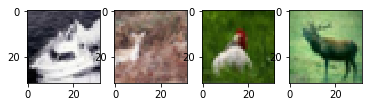

In [2]:
## 2-a Download the CIFAR-10 dataset and load the pickled data into your program.
from keras.datasets import cifar10
%matplotlib inline

#(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train, Y_train, X_test, Y_test = load_cifar_data(DATA_FOLDER_PATH)
X_train, X_val, Y_train, Y_val = train_val_split(X_train, Y_train)
X_train, X_val, X_test, Y_train, Y_val, Y_test = transform_data(X_train, Y_train, X_val, Y_val, X_test, Y_test)

images = []
images.append(X_train[0,:])
images.append(X_train[5,:])
images.append(X_train[10,:])
images.append(X_train[25,:])

plot_images(images)


In [3]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import Model
from keras import optimizers
from keras.optimizers import *
from keras import backend
from keras import optimizers

## 2-b Build a basic convolutional neural network with several convolution, pooling and normalization layers. Flatten the outut
## of the convolutional layers and pass it to a single dense layer that will produce the output using softmax activation.

def create_model(optimizer_to_use, loss, metrics, dropout = 0.0):
    inputs = Input(shape=(32, 32, 3))
    
    x = Conv2D(32, (3,3), padding = "same")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    x = Conv2D(32, (3,3), padding = "same")(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = Conv2D(128, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    x = Conv2D(128, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)
    
  
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    predictions = Dense(num_classes, activation = 'softmax')(x)
    
    model = Model(input = inputs, output = predictions)
    #model.compile(optimizer = eval(optimizer_to_use), loss=loss, metrics=metrics)
    model.compile(optimizer = optimizer_to_use, loss=loss, metrics=metrics)
    return model

def plot(epochs, title, fit, ylabel, xlabel, y_param1, y_param2, y_label1, y_label2):
    N = np.arange(0, epochs)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, fit.history[y_param1], label=y_label1)
    plt.plot(N, fit.history[y_param2], label=y_label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
# https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py
def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr
    
    
def build_and_train_model(train_gen, val_gen, epochs, optimizer, loss_function, patience, dropout, model = None, 
                          use_inceptions = False, use_residuals = False):
    print("In build_and_train_model() for epochs %d optimizer %s loss_function %s patience %d dropout %f"
         %(epochs, optimizer, loss_function, patience, dropout))
    if (model is None):
        model = create_model(optimizer, loss_function, ["accuracy"], dropout)
        print(model.summary())
    
    if not os.path.exists("checkpoints"):
        print("Creating checkpoints directory")
        os.makedirs("checkpoints")

    best_model = os.path.join("checkpoints", "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5")
    checkpoint = ModelCheckpoint(best_model, monitor='val_loss', verbose=1, save_best_only=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)
    
    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

    # callbacks_list = [EarlyStopping(monitor='val_loss', patience=patience), checkpoint]
    callbacks_list = [checkpoint, lr_reducer, lr_scheduler, EarlyStopping(monitor='val_loss', patience=patience)]    

    train_step_size = train_gen.n // batch_size
    val_step_size = val_gen.n // batch_size

    print("Train step size", train_step_size)
    print("Validation step size", val_step_size)
    
    train_gen.reset()
    val_gen.reset()

    fit = model.fit_generator(generator = train_gen,
                        steps_per_epoch = train_step_size,
                        validation_data= val_gen,
                        validation_steps = val_step_size,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        workers =4)
    
    number_of_epochs = len(fit.history['loss'])

    # plot the training loss and accuracy
    plot(number_of_epochs, "Training and Validation Loss (Simple NN)", fit, "Loss", "Epoch #", "loss", "val_loss", "train_loss", "val_loss")
    plot(number_of_epochs, "Training and Validation Accuracy (Simple NN)", fit, "Accuracy", "Epoch #", "acc", "val_acc", "train_acc", "val_acc")
    return model
    
## Define training, validation and testing data generators.
def create_generators(X_train, Y_train, X_test, Y_test, X_val, Y_val):
    print("\ncreate_generators()")
    training_data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                           horizontal_flip=True)
    #training_data_gen = ImageDataGenerator()

    train_gen = training_data_gen.flow(X_train, Y_train, batch_size = batch_size)
    val_gen = training_data_gen.flow(X_val, Y_val, batch_size = batch_size)
    
    test_data_gen = ImageDataGenerator()
    test_gen = test_data_gen.flow(X_test, Y_test, batch_size = batch_size)
    return train_gen, val_gen, test_gen


In [4]:
## 2-c Test the performance of the model you built and tune hyperparameters as needed.
print("\nCreating data generators")
train_gen, val_gen, test_gn = create_generators(X_train, Y_train, X_test, Y_test, X_val, Y_val)



Creating data generators

create_generators()


Training for 100 epochs with Adam(lr = lr_schedule(0)) and no dropout
Learning rate:  0.001
In build_and_train_model() for epochs 100 optimizer <keras.optimizers.Adam object at 0x7f0f808fb518> loss_function categorical_crossentropy patience 25 dropout 0.000000


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
__________

625/625 [==============================] - 33s 53ms/step - loss: 0.6600 - acc: 0.7690 - val_loss: 0.9780 - val_acc: 0.6653

Epoch 00017: val_loss did not improve from 0.78861
Epoch 18/100
Learning rate:  0.001
625/625 [==============================] - 35s 57ms/step - loss: 0.6454 - acc: 0.7749 - val_loss: 0.8670 - val_acc: 0.6945

Epoch 00018: val_loss did not improve from 0.78861
Epoch 19/100
Learning rate:  0.001
625/625 [==============================] - 35s 56ms/step - loss: 0.6367 - acc: 0.7782 - val_loss: 0.8333 - val_acc: 0.7118

Epoch 00019: val_loss did not improve from 0.78861
Epoch 20/100
Learning rate:  0.001
625/625 [==============================] - 35s 56ms/step - loss: 0.6249 - acc: 0.7830 - val_loss: 0.9158 - val_acc: 0.6889

Epoch 00020: val_loss did not improve from 0.78861
Epoch 21/100
Learning rate:  0.001
625/625 [==============================] - 36s 57ms/step - loss: 0.6098 - acc: 0.7863 - val_loss: 0.8945 - val_acc: 0.7013

Epoch 00021: val_loss did not improv

625/625 [==============================] - 32s 51ms/step - loss: 0.4481 - acc: 0.8422 - val_loss: 0.6094 - val_acc: 0.7929

Epoch 00054: val_loss improved from 0.62570 to 0.60937, saving model to checkpoints/weights-improvement-54-0.79.hdf5
Epoch 55/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.4485 - acc: 0.8423 - val_loss: 0.6263 - val_acc: 0.7874

Epoch 00055: val_loss did not improve from 0.60937
Epoch 56/100
Learning rate:  0.001
625/625 [==============================] - 34s 55ms/step - loss: 0.4438 - acc: 0.8442 - val_loss: 0.6706 - val_acc: 0.7811

Epoch 00056: val_loss did not improve from 0.60937
Epoch 57/100
Learning rate:  0.001
625/625 [==============================] - 35s 55ms/step - loss: 0.4446 - acc: 0.8440 - val_loss: 0.6261 - val_acc: 0.7857

Epoch 00057: val_loss did not improve from 0.60937
Epoch 58/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.4453 - acc: 0.8428 - val_lo


Epoch 00090: val_loss did not improve from 0.50940
Epoch 91/100
Learning rate:  0.0001
625/625 [==============================] - 31s 49ms/step - loss: 0.3111 - acc: 0.8906 - val_loss: 0.5335 - val_acc: 0.8282

Epoch 00091: val_loss did not improve from 0.50940
Epoch 92/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.3114 - acc: 0.8909 - val_loss: 0.5192 - val_acc: 0.8285

Epoch 00092: val_loss did not improve from 0.50940
Epoch 93/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.3117 - acc: 0.8892 - val_loss: 0.5143 - val_acc: 0.8303

Epoch 00093: val_loss did not improve from 0.50940
Epoch 94/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.3081 - acc: 0.8909 - val_loss: 0.5200 - val_acc: 0.8305

Epoch 00094: val_loss did not improve from 0.50940
Epoch 95/100
Learning rate:  0.0001
625/625 [==============================] - 32s 51ms/step - loss: 0.3

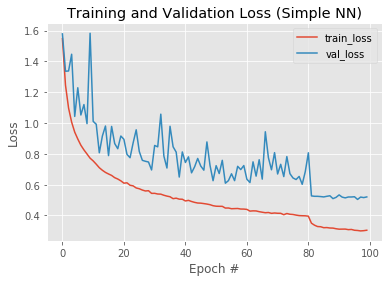

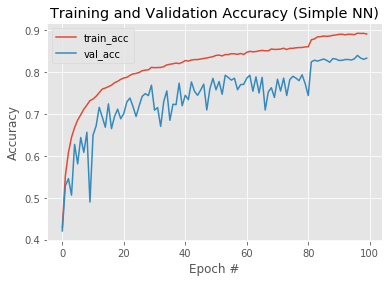

Training for 100 epochs with Adam(lr = lr_schedule(0)) and dropout 0.2
Learning rate:  0.001
In build_and_train_model() for epochs 100 optimizer <keras.optimizers.Adam object at 0x7f0eb8039438> loss_function categorical_crossentropy patience 25 dropout 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
____________

625/625 [==============================] - 33s 52ms/step - loss: 0.7321 - acc: 0.7479 - val_loss: 1.1449 - val_acc: 0.6234

Epoch 00016: val_loss did not improve from 0.84176
Epoch 17/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.7240 - acc: 0.7522 - val_loss: 0.9427 - val_acc: 0.6791

Epoch 00017: val_loss did not improve from 0.84176
Epoch 18/100
Learning rate:  0.001
625/625 [==============================] - 30s 49ms/step - loss: 0.7014 - acc: 0.7597 - val_loss: 0.8712 - val_acc: 0.6998

Epoch 00018: val_loss did not improve from 0.84176
Epoch 19/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.6932 - acc: 0.7624 - val_loss: 0.8091 - val_acc: 0.7240

Epoch 00019: val_loss improved from 0.84176 to 0.80913, saving model to checkpoints/weights-improvement-19-0.72.hdf5
Epoch 20/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.6886 - acc: 0.7643 - val_lo


Epoch 00052: val_loss improved from 0.63575 to 0.62010, saving model to checkpoints/weights-improvement-52-0.79.hdf5
Epoch 53/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.5187 - acc: 0.8242 - val_loss: 0.7098 - val_acc: 0.7626

Epoch 00053: val_loss did not improve from 0.62010
Epoch 54/100
Learning rate:  0.001
625/625 [==============================] - 31s 49ms/step - loss: 0.5224 - acc: 0.8226 - val_loss: 0.9134 - val_acc: 0.7015

Epoch 00054: val_loss did not improve from 0.62010
Epoch 55/100
Learning rate:  0.001
625/625 [==============================] - 31s 49ms/step - loss: 0.5176 - acc: 0.8246 - val_loss: 0.7568 - val_acc: 0.7502

Epoch 00055: val_loss did not improve from 0.62010
Epoch 56/100
Learning rate:  0.001
625/625 [==============================] - 31s 49ms/step - loss: 0.5267 - acc: 0.8212 - val_loss: 0.6718 - val_acc: 0.7798

Epoch 00056: val_loss did not improve from 0.62010
Epoch 57/100
Learning rate:  0.001
625/625

625/625 [==============================] - 31s 50ms/step - loss: 0.3905 - acc: 0.8660 - val_loss: 0.5195 - val_acc: 0.8249

Epoch 00090: val_loss did not improve from 0.49309
Epoch 91/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.3898 - acc: 0.8646 - val_loss: 0.5105 - val_acc: 0.8259

Epoch 00091: val_loss did not improve from 0.49309
Epoch 92/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.3882 - acc: 0.8667 - val_loss: 0.5074 - val_acc: 0.8270

Epoch 00092: val_loss did not improve from 0.49309
Epoch 93/100
Learning rate:  0.0001
625/625 [==============================] - 30s 48ms/step - loss: 0.3838 - acc: 0.8686 - val_loss: 0.4909 - val_acc: 0.8355

Epoch 00093: val_loss improved from 0.49309 to 0.49095, saving model to checkpoints/weights-improvement-93-0.84.hdf5
Epoch 94/100
Learning rate:  0.0001
625/625 [==============================] - 30s 48ms/step - loss: 0.3820 - acc: 0.8688 - va

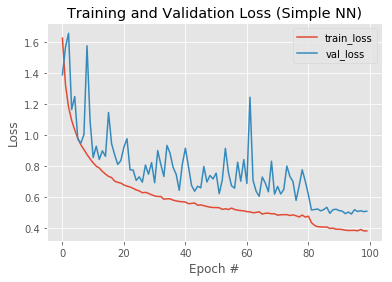

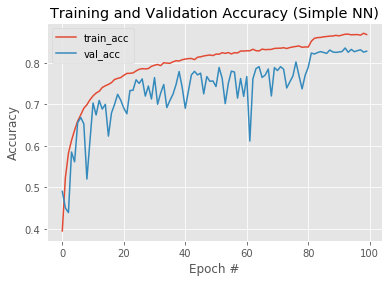

Training for 100 epochs with Adam(lr = lr_schedule(0)) and dropout 0.5
Learning rate:  0.001
In build_and_train_model() for epochs 100 optimizer <keras.optimizers.Adam object at 0x7f0e60761358> loss_function categorical_crossentropy patience 25 dropout 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
____________

625/625 [==============================] - 32s 51ms/step - loss: 0.8448 - acc: 0.7194 - val_loss: 0.8873 - val_acc: 0.6961

Epoch 00016: val_loss improved from 0.90373 to 0.88731, saving model to checkpoints/weights-improvement-16-0.70.hdf5
Epoch 17/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.8329 - acc: 0.7221 - val_loss: 0.9502 - val_acc: 0.6677

Epoch 00017: val_loss did not improve from 0.88731
Epoch 18/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.8247 - acc: 0.7261 - val_loss: 0.7889 - val_acc: 0.7391

Epoch 00018: val_loss improved from 0.88731 to 0.78892, saving model to checkpoints/weights-improvement-18-0.74.hdf5
Epoch 19/100
Learning rate:  0.001
625/625 [==============================] - 34s 54ms/step - loss: 0.8111 - acc: 0.7313 - val_loss: 0.8553 - val_acc: 0.7048

Epoch 00019: val_loss did not improve from 0.78892
Epoch 20/100
Learning rate:  0.001
625/625 [===================

625/625 [==============================] - 32s 51ms/step - loss: 0.6214 - acc: 0.7967 - val_loss: 1.0242 - val_acc: 0.6645

Epoch 00053: val_loss did not improve from 0.70635
Epoch 54/100
Learning rate:  0.001
625/625 [==============================] - 32s 50ms/step - loss: 0.6213 - acc: 0.7964 - val_loss: 0.7272 - val_acc: 0.7475

Epoch 00054: val_loss did not improve from 0.70635
Epoch 55/100
Learning rate:  0.001
625/625 [==============================] - 34s 54ms/step - loss: 0.6193 - acc: 0.7994 - val_loss: 0.7021 - val_acc: 0.7597

Epoch 00055: val_loss improved from 0.70635 to 0.70211, saving model to checkpoints/weights-improvement-55-0.76.hdf5
Epoch 56/100
Learning rate:  0.001
625/625 [==============================] - 32s 52ms/step - loss: 0.6145 - acc: 0.7989 - val_loss: 0.6372 - val_acc: 0.7889

Epoch 00056: val_loss improved from 0.70211 to 0.63724, saving model to checkpoints/weights-improvement-56-0.79.hdf5
Epoch 57/100
Learning rate:  0.001
625/625 [===================

625/625 [==============================] - 32s 52ms/step - loss: 0.4820 - acc: 0.8403 - val_loss: 0.5164 - val_acc: 0.8261

Epoch 00090: val_loss improved from 0.52179 to 0.51643, saving model to checkpoints/weights-improvement-90-0.83.hdf5
Epoch 91/100
Learning rate:  0.0001
625/625 [==============================] - 32s 51ms/step - loss: 0.4794 - acc: 0.8413 - val_loss: 0.5306 - val_acc: 0.8184

Epoch 00091: val_loss did not improve from 0.51643
Epoch 92/100
Learning rate:  0.0001
625/625 [==============================] - 32s 50ms/step - loss: 0.4723 - acc: 0.8448 - val_loss: 0.5134 - val_acc: 0.8247

Epoch 00092: val_loss improved from 0.51643 to 0.51339, saving model to checkpoints/weights-improvement-92-0.82.hdf5
Epoch 93/100
Learning rate:  0.0001
625/625 [==============================] - 31s 50ms/step - loss: 0.4668 - acc: 0.8461 - val_loss: 0.5211 - val_acc: 0.8220

Epoch 00093: val_loss did not improve from 0.51339
Epoch 94/100
Learning rate:  0.0001
625/625 [===============

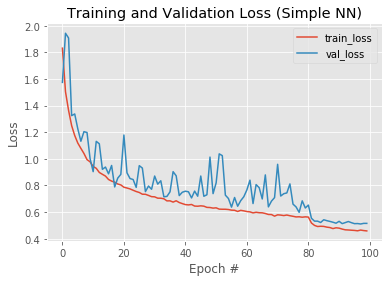

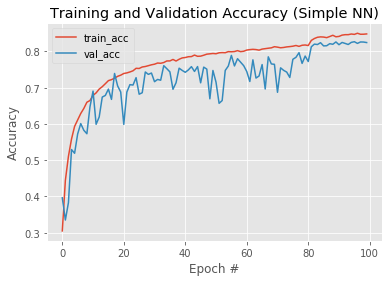

Training for 100 epochs with SGD(lr = 0.01) and no dropout
In build_and_train_model() for epochs 100 optimizer <keras.optimizers.SGD object at 0x7f0f821e0fd0> loss_function categorical_crossentropy patience 25 dropout 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_______________________________________________

625/625 [==============================] - 34s 54ms/step - loss: 0.9046 - acc: 0.6797 - val_loss: 0.9787 - val_acc: 0.6531

Epoch 00016: val_loss improved from 1.04021 to 0.97872, saving model to checkpoints/weights-improvement-16-0.65.hdf5
Epoch 17/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.8889 - acc: 0.6868 - val_loss: 1.2626 - val_acc: 0.5566

Epoch 00017: val_loss did not improve from 0.97872
Epoch 18/100
Learning rate:  0.001
625/625 [==============================] - 34s 54ms/step - loss: 0.8723 - acc: 0.6920 - val_loss: 1.0537 - val_acc: 0.6297

Epoch 00018: val_loss did not improve from 0.97872
Epoch 19/100
Learning rate:  0.001
625/625 [==============================] - 34s 54ms/step - loss: 0.8647 - acc: 0.6946 - val_loss: 0.9998 - val_acc: 0.6469

Epoch 00019: val_loss did not improve from 0.97872
Epoch 20/100
Learning rate:  0.001
625/625 [==============================] - 34s 54ms/step - loss: 0.8475 - acc: 0.7030 - val_lo

625/625 [==============================] - 35s 57ms/step - loss: 0.6511 - acc: 0.7711 - val_loss: 0.7932 - val_acc: 0.7270

Epoch 00052: val_loss did not improve from 0.77922
Epoch 53/100
Learning rate:  0.001
625/625 [==============================] - 35s 56ms/step - loss: 0.6455 - acc: 0.7732 - val_loss: 0.9107 - val_acc: 0.6828

Epoch 00053: val_loss did not improve from 0.77922
Epoch 54/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.6407 - acc: 0.7740 - val_loss: 0.8042 - val_acc: 0.7244

Epoch 00054: val_loss did not improve from 0.77922
Epoch 55/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.6454 - acc: 0.7734 - val_loss: 0.7937 - val_acc: 0.7269

Epoch 00055: val_loss did not improve from 0.77922
Epoch 56/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.6350 - acc: 0.7758 - val_loss: 0.7858 - val_acc: 0.7219

Epoch 00056: val_loss did not improv


Epoch 00088: val_loss improved from 0.63212 to 0.63091, saving model to checkpoints/weights-improvement-88-0.78.hdf5
Epoch 89/100
Learning rate:  0.0001
625/625 [==============================] - 32s 52ms/step - loss: 0.5376 - acc: 0.8131 - val_loss: 0.6462 - val_acc: 0.7763

Epoch 00089: val_loss did not improve from 0.63091
Epoch 90/100
Learning rate:  0.0001
625/625 [==============================] - 33s 53ms/step - loss: 0.5364 - acc: 0.8127 - val_loss: 0.6444 - val_acc: 0.7785

Epoch 00090: val_loss did not improve from 0.63091
Epoch 91/100
Learning rate:  0.0001
625/625 [==============================] - 35s 56ms/step - loss: 0.5319 - acc: 0.8150 - val_loss: 0.6403 - val_acc: 0.7783

Epoch 00091: val_loss did not improve from 0.63091
Epoch 92/100
Learning rate:  0.0001
625/625 [==============================] - 34s 55ms/step - loss: 0.5350 - acc: 0.8105 - val_loss: 0.6444 - val_acc: 0.7795

Epoch 00092: val_loss did not improve from 0.63091
Epoch 93/100
Learning rate:  0.0001
62

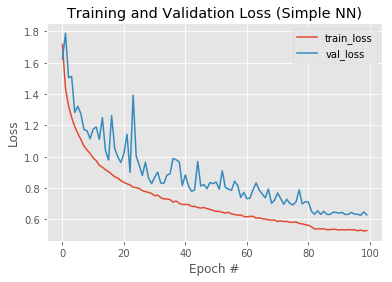

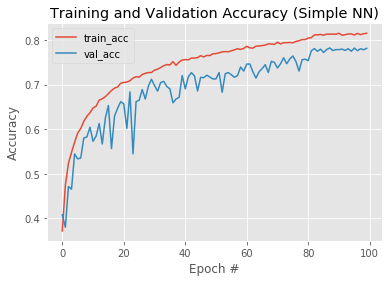

In [5]:
## 2-c Test the performance of the model you built and tune hyperparameters as needed.

print("Training for 100 epochs with Adam(lr = lr_schedule(0)) and no dropout")
model_1_adam_no_dropout = build_and_train_model(train_gen, val_gen, 100, optimizers.Adam(lr = lr_schedule(0)), 
                                           "categorical_crossentropy", 25, 0)

print("Training for 100 epochs with Adam(lr = lr_schedule(0)) and dropout 0.2")
model_1_adam_dropout_1 = build_and_train_model(train_gen, val_gen, 100, optimizers.Adam(lr = lr_schedule(0)), 
                                          "categorical_crossentropy", 25, 0.2)

print("Training for 100 epochs with Adam(lr = lr_schedule(0)) and dropout 0.5")
model_1_adam_dropout_2 = build_and_train_model(train_gen, val_gen, 100, optimizers.Adam(lr = lr_schedule(0)),
                                          "categorical_crossentropy", 25, 0.5)

lr = 0.01
decay_100 =  lr / 100

print("Training for 100 epochs with SGD(lr = 0.01) and no dropout")
model_2_sgd_no_dropout = build_and_train_model(train_gen, val_gen, 100, optimizers.SGD(lr = lr, momentum = 0.9, decay = decay_100), 
                                           "categorical_crossentropy", 25, 0)


In [17]:
print("\nModel 1 with optimizer Adam(lr = 0.001) with dropout trained for 100 epochs seems to be the best model here.")

print("\nTesting models")

val_gen.reset()
scores = model_1_adam_no_dropout.evaluate_generator(val_gen, verbose = 1)
print("Model Adam no dropout. Validation generator evaluation scores are", scores)

scores = model_1_adam_no_dropout.evaluate(X_test, Y_test, verbose = 1)
print("Model Adam no dropout. Test scores are", scores)

val_gen.reset()
scores = model_1_adam_dropout_1.evaluate_generator(val_gen, verbose = 1)
print("Model Adam dropout 0.2. Validation generator evaluation scores are", scores)

scores = model_1_adam_dropout_1.evaluate(X_test, Y_test, verbose = 1)
print("Model Adam dropout 0.2. Test scores are", scores)


Model 1 with optimizer Adam(lr = 0.001) with dropout trained for 100 epochs seems to be the best model here.

Testing models
157/157 [==============================] - 5s 30ms/step
Model Adam no dropout. Validation generator evaluation scores are [0.5128852812767029, 0.8323]
10000/10000 [==============================] - 2s 158us/step
Model Adam no dropout. Test scores are [0.5165493470668793, 0.8411]
157/157 [==============================] - 6s 36ms/step
Model Adam dropout 0.2. Validation generator evaluation scores are [0.4991935375213623, 0.8332]
10000/10000 [==============================] - 2s 163us/step
Model Adam dropout 0.2. Test scores are [0.5054186179876328, 0.8352]


In [14]:
## 2d Add one or two inception blocks and test performance

# Helper function for creating an inception block.
def create_inception_block(inputs, channels):
    tower_1 = Conv2D(channels, (1,1), padding='same', activation='relu')(inputs)
    tower_1 = Conv2D(channels, (3,3), padding='same', activation='relu')(tower_1)
    tower_2 = Conv2D(channels, (1,1), padding='same', activation='relu')(inputs)
    tower_2 = Conv2D(channels, (5,5), padding='same', activation='relu')(tower_2)
    tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inputs)
    tower_3 = Conv2D(channels, (1,1), padding='same', activation='relu')(tower_3)    
    x = concatenate([tower_1, tower_2, tower_3], axis=3)
    return x

# Creates a CNN model using two inception modules.
def create_inception_model(optimizer_to_use, loss, metrics, dropout):
    inputs = Input(shape=(32, 32, 3))
    
    # We add two inception blocks. One at the start and one in the middle.
    x = create_inception_block(inputs, 32)
    
    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = create_inception_block(x, 128)
    
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    predictions = Dense(num_classes, activation = 'softmax')(x)
    
    model = Model(input = inputs, output = predictions)
    model.compile(optimizer = optimizer_to_use, loss=loss, metrics=metrics)
    return model

Learning rate:  0.001


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 32, 32, 32)   128         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 32, 32, 32)   128         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D) (None, 32, 32, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_26 


Epoch 00003: val_loss improved from 1.51894 to 1.35596, saving model to checkpoints/weights-improvement-03-0.51.hdf5
Epoch 4/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 1.1932 - acc: 0.5732 - val_loss: 1.1563 - val_acc: 0.5892

Epoch 00004: val_loss improved from 1.35596 to 1.15633, saving model to checkpoints/weights-improvement-04-0.59.hdf5
Epoch 5/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 1.1285 - acc: 0.5990 - val_loss: 1.2519 - val_acc: 0.5604

Epoch 00005: val_loss did not improve from 1.15633
Epoch 6/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 1.0684 - acc: 0.6233 - val_loss: 1.0817 - val_acc: 0.6231

Epoch 00006: val_loss improved from 1.15633 to 1.08175, saving model to checkpoints/weights-improvement-06-0.62.hdf5
Epoch 7/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 1.0233 - acc: 0.6394 - v

Epoch 38/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.6070 - acc: 0.7934 - val_loss: 0.6745 - val_acc: 0.7695

Epoch 00038: val_loss improved from 0.68753 to 0.67448, saving model to checkpoints/weights-improvement-38-0.77.hdf5
Epoch 39/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.5927 - acc: 0.7973 - val_loss: 0.6857 - val_acc: 0.7707

Epoch 00039: val_loss did not improve from 0.67448
Epoch 40/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.5929 - acc: 0.7969 - val_loss: 0.6687 - val_acc: 0.7719

Epoch 00040: val_loss improved from 0.67448 to 0.66868, saving model to checkpoints/weights-improvement-40-0.77.hdf5
Epoch 41/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.5945 - acc: 0.7963 - val_loss: 0.6637 - val_acc: 0.7748

Epoch 00041: val_loss improved from 0.66868 to 0.66370, saving model to checkpo

Epoch 75/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.4746 - acc: 0.8387 - val_loss: 0.5742 - val_acc: 0.8093

Epoch 00075: val_loss did not improve from 0.57340
Epoch 76/100
Learning rate:  0.001
625/625 [==============================] - 54s 86ms/step - loss: 0.4751 - acc: 0.8379 - val_loss: 0.5598 - val_acc: 0.8102

Epoch 00076: val_loss improved from 0.57340 to 0.55985, saving model to checkpoints/weights-improvement-76-0.81.hdf5
Epoch 77/100
Learning rate:  0.001
625/625 [==============================] - 54s 87ms/step - loss: 0.4704 - acc: 0.8393 - val_loss: 0.5909 - val_acc: 0.8027

Epoch 00077: val_loss did not improve from 0.55985
Epoch 78/100
Learning rate:  0.001
625/625 [==============================] - 54s 87ms/step - loss: 0.4736 - acc: 0.8387 - val_loss: 0.5954 - val_acc: 0.7968

Epoch 00078: val_loss did not improve from 0.55985
Epoch 79/100
Learning rate:  0.001
625/625 [==============================] - 54s 87ms/step - 

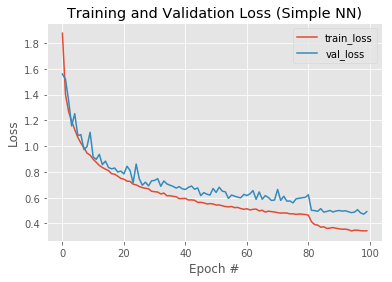

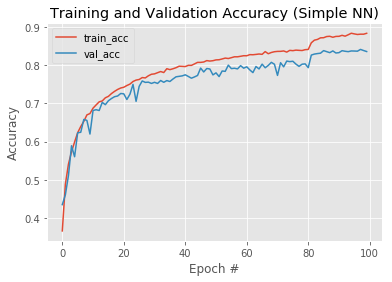

In [15]:
## 2d Add one or two inception blocks and test performance

inception_model = create_inception_model(optimizers.Adam(lr_schedule(0)), "categorical_crossentropy", ["accuracy"], 0.2)
print(inception_model.summary())
print("Training an inception model for 100 epochs with Adam(lr = 0.001) and dropout")
inception_model = build_and_train_model(train_gen, val_gen, 100, optimizers.Adam(lr_schedule(0)), "categorical_crossentropy", 25, 0.2,
                                       inception_model)


In [18]:
## 2d Add one or two inception blocks and test performance

print("\nTesting inception model")

val_gen.reset()
scores = inception_model.evaluate_generator(val_gen, verbose = 1)
print("Inception model dropout 0.2. Validation generator evaluation scores are", scores)

scores = inception_model.evaluate(X_test, Y_test, verbose = 1)
print("Inception model dropout 0.2. Test scores are", scores)


Testing inception model
157/157 [==============================] - 6s 40ms/step
Inception model dropout 0.2. Validation generator evaluation scores are [0.48669282274246217, 0.8384]
10000/10000 [==============================] - 3s 288us/step
Inception model dropout 0.2. Test scores are [0.5071342997074128, 0.8438]


In [20]:
import keras.layers

## 2e Remove the inception blocks and add one or two residual blocks instead. Test performance and compare to previous
##    results

# Helper function for creating a residual block.
# https://towardsdatascience.com/understanding-residual-networks-9add4b664b03
def create_residual_block(x, filters, pool=False):
    result = x
    if pool:
        x = MaxPooling2D(pool_size=(2, 2))(x)
        result = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(result)
        
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([result,out])

    return out

# Creates a model using two residual blocks
def create_resnet(optimizer_to_use, loss, metrics, dropout):
    inputs = Input(shape=(32, 32, 3))
    
    # We add two residual blocks. One at the start and one in the middle.
    x = create_residual_block(inputs, 32, True)
    
    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = Conv2D(64, (3,3), padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2, 2))(x)

    x = create_residual_block(x, 128, True)
    
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    x = Dense(1024)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout)(x)
    predictions = Dense(num_classes, activation = 'softmax')(x)
    
    model = Model(input = inputs, output = predictions)
    model.compile(optimizer = optimizer_to_use, loss=loss, metrics=metrics)
    return model

Learning rate:  0.001


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
max_pooling2d_33 (MaxPooling2D) (None, 16, 16, 3)    0           input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 16, 16, 3)    12          max_pooling2d_33[0][0]           
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 16, 16, 3)    0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
conv2d_46 

625/625 [==============================] - 34s 55ms/step - loss: 1.8023 - acc: 0.3470 - val_loss: 1.6579 - val_acc: 0.4017

Epoch 00001: val_loss improved from inf to 1.65787, saving model to checkpoints/weights-improvement-01-0.40.hdf5
Epoch 2/100
Learning rate:  0.001
625/625 [==============================] - 32s 52ms/step - loss: 1.5555 - acc: 0.4389 - val_loss: 1.5037 - val_acc: 0.4706

Epoch 00002: val_loss improved from 1.65787 to 1.50367, saving model to checkpoints/weights-improvement-02-0.47.hdf5
Epoch 3/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 1.4307 - acc: 0.4862 - val_loss: 1.4648 - val_acc: 0.4871

Epoch 00003: val_loss improved from 1.50367 to 1.46477, saving model to checkpoints/weights-improvement-03-0.49.hdf5
Epoch 4/100
Learning rate:  0.001
625/625 [==============================] - 31s 50ms/step - loss: 1.3497 - acc: 0.5168 - val_loss: 1.3852 - val_acc: 0.5015

Epoch 00004: val_loss improved from 1.46477 to 1.38524,

Epoch 34/100
Learning rate:  0.001
625/625 [==============================] - 30s 49ms/step - loss: 0.8099 - acc: 0.7190 - val_loss: 0.8948 - val_acc: 0.6897

Epoch 00034: val_loss did not improve from 0.89136
Epoch 35/100
Learning rate:  0.001
625/625 [==============================] - 30s 48ms/step - loss: 0.8013 - acc: 0.7243 - val_loss: 0.9480 - val_acc: 0.6724

Epoch 00035: val_loss did not improve from 0.89136
Epoch 36/100
Learning rate:  0.001
625/625 [==============================] - 31s 49ms/step - loss: 0.8025 - acc: 0.7233 - val_loss: 0.8558 - val_acc: 0.7057

Epoch 00036: val_loss improved from 0.89136 to 0.85577, saving model to checkpoints/weights-improvement-36-0.71.hdf5
Epoch 37/100
Learning rate:  0.001
625/625 [==============================] - 33s 52ms/step - loss: 0.8001 - acc: 0.7255 - val_loss: 0.9133 - val_acc: 0.6868

Epoch 00037: val_loss did not improve from 0.85577
Epoch 38/100
Learning rate:  0.001
625/625 [==============================] - 31s 50ms/step - 

625/625 [==============================] - 34s 54ms/step - loss: 0.7032 - acc: 0.7606 - val_loss: 0.8783 - val_acc: 0.7077

Epoch 00071: val_loss did not improve from 0.77888
Epoch 72/100
Learning rate:  0.001
625/625 [==============================] - 33s 54ms/step - loss: 0.6956 - acc: 0.7619 - val_loss: 0.8276 - val_acc: 0.7164

Epoch 00072: val_loss did not improve from 0.77888
Epoch 73/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.6919 - acc: 0.7637 - val_loss: 0.8015 - val_acc: 0.7271

Epoch 00073: val_loss did not improve from 0.77888
Epoch 74/100
Learning rate:  0.001
625/625 [==============================] - 32s 51ms/step - loss: 0.7046 - acc: 0.7616 - val_loss: 0.8096 - val_acc: 0.7275

Epoch 00074: val_loss did not improve from 0.77888
Epoch 75/100
Learning rate:  0.001
625/625 [==============================] - 33s 53ms/step - loss: 0.6960 - acc: 0.7624 - val_loss: 0.8019 - val_acc: 0.7242

Epoch 00075: val_loss did not improv

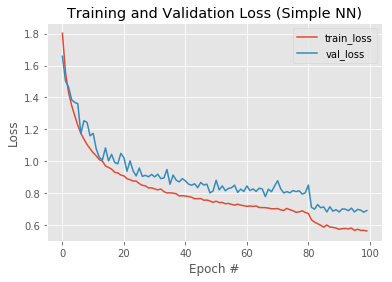

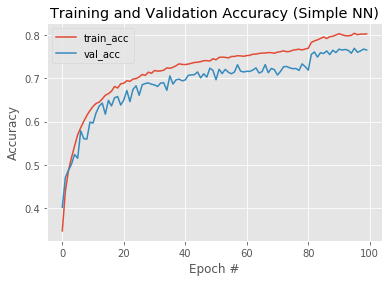

In [22]:
## 2e Remove the inception blocks and add one or two residual blocks instead. Test performance and compare to previous
##    results

resnet_model = create_resnet(optimizers.Adam(lr_schedule(0)), "categorical_crossentropy", ["accuracy"], 0.2)
print(resnet_model.summary())
print("Training a resnet model for 100 epochs with Adam(lr = 0.001) and dropout 0.2")
resnet_model = build_and_train_model(train_gen, val_gen, 100, optimizers.Adam(lr_schedule(0)), "categorical_crossentropy", 25, 0.2,
                                        resnet_model)

In [23]:
## 2e Remove the inception blocks and add one or two residual blocks instead. Test performance and compare to previous
##    results

print("\nTesting resnet model")

scores = resnet_model.evaluate_generator(val_gen, verbose = 1)
print("Resnet model dropout 0.2. Validation generator evaluation scores are", scores)

scores = resnet_model.evaluate(X_test, Y_test, verbose = 1)
print("Resnet model dropout 0.2. Test scores are", scores)


Testing resnet model
157/157 [==============================] - 7s 45ms/step
Resnet model dropout 0.2. Validation generator evaluation scores are [0.7001209585189819, 0.7585]
10000/10000 [==============================] - 2s 169us/step
Resnet model dropout 0.2. Test scores are [0.6171807104110718, 0.7957]
